In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [3]:
df = pd.read_csv('spotify_data.zip')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1159764 non-null  int64  
 1   artist_name       1159749 non-null  object 
 2   track_name        1159763 non-null  object 
 3   track_id          1159764 non-null  object 
 4   popularity        1159764 non-null  int64  
 5   year              1159764 non-null  int64  
 6   genre             1159764 non-null  object 
 7   danceability      1159764 non-null  float64
 8   energy            1159764 non-null  float64
 9   key               1159764 non-null  int64  
 10  loudness          1159764 non-null  float64
 11  mode              1159764 non-null  int64  
 12  speechiness       1159764 non-null  float64
 13  acousticness      1159764 non-null  float64
 14  instrumentalness  1159764 non-null  float64
 15  liveness          1159764 non-null  float64
 16  

In [5]:
def clean_outliers(df_aux, columns: list)->pd.DataFrame:
    """
    Función que elimina los valores atípicos de un dataframe en base a los cuartiles.
    
    Args: df_aux: DataFrame a limpiar.
        columns: Lista de columnas a limpiar.
    Returns: DataFrame sin valores atípicos
    """
    for column in columns:
        Q1 = df_aux[column].quantile(0.25)
        Q3 = df_aux[column].quantile(0.75)
        IQR = Q3 - Q1
        df_aux = df_aux[(df_aux[column] >= Q1-1.5*IQR) & (df_aux[column] <= Q3 + 1.5*IQR)]
    return df_aux

In [6]:
df = clean_outliers(df, ['loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'danceability', 'energy'])

In [7]:
def normalize_data(df:pd.DataFrame, columns:list[str]):
    # restar la media y dividir entre la desviacion tipica
    for column in columns:
        df[column] = (df[column] - df[column].mean()) / df[column].std()
    return df

In [8]:
df["loudness"] = StandardScaler().fit_transform(df[["loudness"]])

In [9]:
df = normalize_data(df, ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence"])

In [10]:
# df = df.sample(frac=0.3, random_state=42)

In [11]:
df_aux = df[df["popularity"] >= 40]

In [128]:
df_aux

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,-0.391496,-1.484831,4,-0.565039,1,-0.480778,1.235078,-0.680152,-0.518891,-1.253612,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.119393,-0.861456,3,-0.626523,1,-1.003962,0.582331,-0.680114,-0.676896,0.161790,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,-0.816281,-1.769684,3,-1.550139,1,-0.805091,0.164211,-0.680012,-0.747818,-1.231026,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,-0.913866,-1.699503,10,-0.507599,1,-0.682709,1.574988,-0.680152,-0.835798,0.135439,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,-0.695734,0.529784,6,0.685954,0,-0.869342,-0.634126,-0.625835,-0.563778,-0.959991,171.864,244320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158023,1469568,Veronica Maggio,Alla mina låtar,5y5tGEVkCJ5kfhmmidqeOO,41,2011,swedish,-0.311132,0.009617,2,0.132864,1,-0.756138,-0.844690,-0.678419,-0.667918,-0.429216,154.963,209373,4
1159047,1471681,Nadia Ali,Pressure - Alesso Remix,582JLMTy2WCHPgKFJ4xCq7,50,2011,trance,0.509736,0.533912,10,0.832654,0,-0.511373,-0.850893,1.019732,-0.882482,-0.335106,128.001,368000,4
1159048,1471690,Nadia Ali,Pressure - Alesso Radio Edit,4uB7RmCoM5NAZKMYypDLpz,45,2011,trance,-0.138922,0.839407,10,0.303294,0,-0.734721,-0.851988,1.050690,-0.114901,-0.775537,128.033,182930,4
1159049,1471696,iio,Rapture (Armin Van Burren Remix Remastered - M...,4RQGig0Vhr4GXmqfklCCyK,47,2011,trance,-0.058557,1.107747,10,-0.464992,0,-0.104452,0.128115,-0.317098,1.366395,-1.219733,128.584,189701,4


### Regresion

In [111]:
X, y = df_aux.drop(columns={"year", "Unnamed: 0", "popularity", "artist_name", "track_name", "track_id", "genre", "duration_ms", "time_signature", "key", "mode", "tempo"}, axis=1), df_aux['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=15)

In [112]:
X_train

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
174911,1.663542,0.187134,1.055940,-0.581743,-0.831755,-0.680144,-0.683180,0.158026
298700,0.664725,-0.886226,0.577817,-0.486897,0.726717,-0.680152,-0.937245,1.882106
257842,1.485592,0.071542,0.369633,-0.685768,-0.413335,-0.676325,1.339462,1.882106
413693,-0.804800,-0.877970,0.578356,-0.728602,1.259143,-0.680152,-0.850162,-0.101716
1049246,0.159575,-1.266031,-0.903203,-0.997843,-0.007248,-0.680118,0.091583,-0.873411
...,...,...,...,...,...,...,...,...
452981,1.106730,-1.394008,-0.415373,0.170908,0.224372,-0.680150,-0.635599,-1.295020
547505,0.280122,0.921973,1.112031,-0.789793,-0.818821,-0.635404,2.165397,-0.180767
126316,-1.505120,-0.089462,0.602087,-0.364515,-0.506585,-0.680152,-0.876197,-1.023985
473910,1.169874,-0.233953,0.411971,-0.835686,0.795903,-0.680152,-0.402183,0.545755


In [113]:
epsilon = 100
max_iter = 500

model = HuberRegressor(epsilon=epsilon, max_iter=max_iter)
model.fit(X_train, y_train) 
mse_SVR = mse(y_test,model.predict(X_test))
print(mse_SVR)

63.30917913494045


In [115]:
#Librerías
from sklearn.ensemble import RandomForestRegressor
#Inicializamos modelo y parámetros
n_estimators = 200 #Estimadores del modelo
criterion = 'squared_error' #Forma de calcular el error
max_depth = None #Límite de profundidad de los árboles
min_samples_split = 2 #Criterio de parada de profundidad
verbose = 1 #Información devuelta por el método
#Instanciamos el modelo
model = RandomForestRegressor(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, verbose=verbose)
#Entrenamos modelo y elaboramos predicciones
model.fit(X_train, y_train)
mse_RF = mse(y_test,model.predict(X_test))
print(mse_RF)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   36.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  2.4min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


64.28771447474


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.5s


In [114]:
#Librerías
import xgboost as xgb
#Inicializamos modelo y parámetros
params = {"booster":"gbtree", "max_depth": 2, "eta": 0.3, "objective": "reg:squarederror", "nthread":2}
num_boost_round = 10
train_data = xgb.DMatrix(X_train, label=y_train)
test_data = xgb.DMatrix(X_test, label=y_test)
#Instanciamos el modelo, entrenamos y elaboramos predicciones
model = xgb.train(params = params, dtrain = train_data, num_boost_round=num_boost_round)
mse_XGB = mse(y_test,model.predict(test_data))
print(mse_XGB)

63.18871139943824


In [116]:
#Librerías
from sklearn import svm
#Inicializamos modelo y parámetros
C = 1 #Parámetro regularizador
kernel = 'rbf' #Núcleo transformador
#Instanciamos el modelo
model = svm.SVR(C = C, kernel = kernel)
#Entrenamos modelo y elaboramos predicciones
model.fit(X_train, y_train)
mse_SVR = mse(y_test,model.predict(X_test))
print(mse_SVR)

65.89237475829054


Text(0.5, 0, 'Modelo')

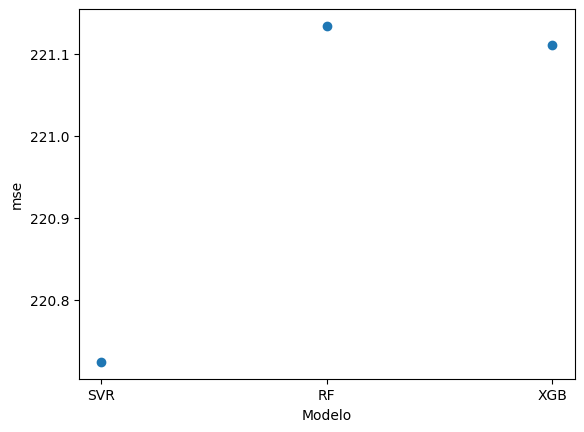

In [139]:
mse = [mse_SVR, mse_RF, mse_XGB]
plt.scatter(['SVR', 'RF', 'XGB'], mse)
plt.ylabel('mse')
plt.xlabel('Modelo')

### Clasificacion

In [12]:
from sklearn.metrics import classification_report

In [13]:
def popularity(x):
    if 25 > x >= 0 :
        return "Baja popularidad"
    elif 50 > x >= 25:
        return "Popularidad media"
    else:
        return "Alta popularidad" 

In [21]:
def popularity(x):
    if 50 > x >= 0 :
        return "Baja popularidad"
    else:
        return "Alta popularidad"

In [22]:
df["popularity_target"] = df["popularity"].apply(lambda x: popularity(x))

In [23]:
df["popularity_target"].value_counts()

popularity_target
Baja popularidad    849109
Alta popularidad     41044
Name: count, dtype: int64

In [24]:
X, y = df.drop(columns={"year", "Unnamed: 0", "popularity", "artist_name", "track_name", "track_id", "genre", "duration_ms", "time_signature", "key", "mode", "tempo", "popularity_target"}, axis=1), df['popularity_target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=15)

In [25]:
from sklearn.linear_model import LogisticRegression
# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(max_iter =100)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

Alta popularidad       0.00      0.00      0.00     10325
Baja popularidad       0.95      1.00      0.98    212214

        accuracy                           0.95    222539
       macro avg       0.48      0.50      0.49    222539
    weighted avg       0.91      0.95      0.93    222539



In [26]:
from sklearn.neighbors import KNeighborsClassifier
#Parámetros
weights = 'distance'
p = 2
n_neighbours = 10
#Modelo
clf = KNeighborsClassifier(n_neighbors = n_neighbours, weights = weights, p = p)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

Alta popularidad       0.19      0.01      0.02     10325
Baja popularidad       0.95      1.00      0.98    212214

        accuracy                           0.95    222539
       macro avg       0.57      0.50      0.50    222539
    weighted avg       0.92      0.95      0.93    222539



In [27]:
from sklearn.naive_bayes import GaussianNB
#Tratamos datos como pd.DataFrame
#Modelo
nbmodelo = GaussianNB()

nbmodelo.fit(X_train, y_train)
y_pred = nbmodelo.predict(X_test)

print(classification_report(y_test, y_pred))

C:\Users\NITROPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NITROPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                  precision    recall  f1-score   support

Alta popularidad       0.00      0.00      0.00     10325
Baja popularidad       0.95      1.00      0.98    212214

        accuracy                           0.95    222539
       macro avg       0.48      0.50      0.49    222539
    weighted avg       0.91      0.95      0.93    222539



C:\Users\NITROPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
y_preds = RFC.predict(X_test)
print(classification_report(y_test, y_preds))

                  precision    recall  f1-score   support

Alta popularidad       0.25      0.00      0.01     10325
Baja popularidad       0.95      1.00      0.98    212214

        accuracy                           0.95    222539
       macro avg       0.60      0.50      0.49    222539
    weighted avg       0.92      0.95      0.93    222539



In [33]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=357, validation_fraction=0.1,n_iter_no_change=5, tol=0.01)
clf.fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test) #comentario prueba
print(classification_report(y_test, y_pred, zero_division=0))

                  precision    recall  f1-score   support

Alta popularidad       0.00      0.00      0.00     10325
Baja popularidad       0.95      1.00      0.98    212214

        accuracy                           0.95    222539
       macro avg       0.48      0.50      0.49    222539
    weighted avg       0.91      0.95      0.93    222539

